## Reading and Understanding the Data

Let us first import NumPy and Pandas and read the COUNTRY dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import required libraries

import numpy as np
import pandas as pd

# Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import data

country_df = pd.read_csv('C:/Users/VIJAY/Downloads/Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the rows and columns

country_df.shape

(167, 10)

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Check for column-wise null values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
# Check for row-wise null values

country_df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
137    0
138    0
139    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

In [9]:
# Check duplicates

country_df.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

## Checking for Outliers

In [10]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


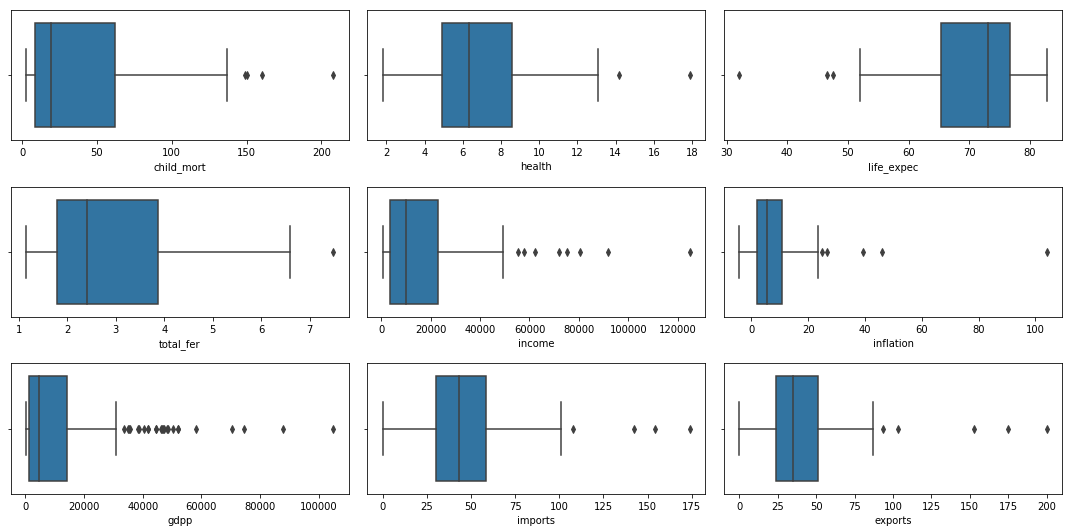

In [11]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])


plt.tight_layout()


### Making a copy before Outlier treatment

In [12]:
country_data = country_df.copy()
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Treat the outliers

In [13]:


percentiles = country_data['child_mort'].quantile([0.05,0.95]).values
country_data['child_mort'][country_data['child_mort'] <= percentiles[0]] = percentiles[0]
country_data['child_mort'][country_data['child_mort'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['exports'].quantile([0.05,0.95]).values
country_data['exports'][country_data['exports'] <= percentiles[0]] = percentiles[0]
country_data['exports'][country_data['exports'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['health'].quantile([0.05,0.95]).values
country_data['health'][country_data['health'] <= percentiles[0]] = percentiles[0]
country_data['health'][country_data['health'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['imports'].quantile([0.05,0.95]).values
country_data['imports'][country_data['imports'] <= percentiles[0]] = percentiles[0]
country_data['imports'][country_data['imports'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['income'].quantile([0.05,0.95]).values
country_data['income'][country_data['income'] <= percentiles[0]] = percentiles[0]
country_data['income'][country_data['income'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['inflation'].quantile([0.05,0.95]).values
country_data['inflation'][country_data['inflation'] <= percentiles[0]] = percentiles[0]
country_data['inflation'][country_data['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['life_expec'].quantile([0.05,0.95]).values
country_data['life_expec'][country_data['life_expec'] <= percentiles[0]] = percentiles[0]
country_data['life_expec'][country_data['life_expec'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['total_fer'].quantile([0.05,0.95]).values
country_data['total_fer'][country_data['total_fer'] <= percentiles[0]] = percentiles[0]
country_data['total_fer'][country_data['total_fer'] >= percentiles[1]] = percentiles[1]

percentiles = country_data['gdpp'].quantile([0.05,0.95]).values
country_data['gdpp'][country_data['gdpp'] <= percentiles[0]] = percentiles[0]
country_data['gdpp'][country_data['gdpp'] >= percentiles[1]] = percentiles[1]

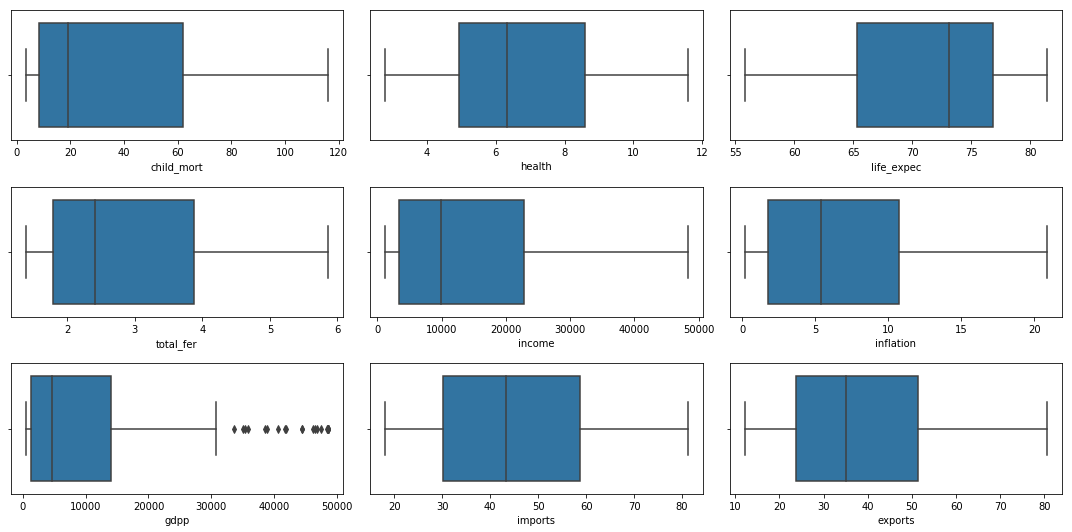

In [14]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_data['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_data['exports'], ax = axs[2,2])


plt.tight_layout()


### Since there are no outliers in the data, we can process it for PCA 

In [15]:
## Scaling of data

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaling = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
country_data[scaling] = standard_scaler.fit_transform(country_data[scaling])
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,Albania,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,Algeria,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,Angola,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,Antigua and Barbuda,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [16]:
country_data.shape

(167, 10)

In [17]:
## Drop country column

pca_data = country_data.drop('country', axis=1)
pca_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [18]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [19]:
#Doing the PCA on the data

pca.fit_transform(pca_data)

array([[-3.27670957,  0.38482513, -1.06169305, ...,  0.14155957,
         0.42614524,  0.10781789],
       [ 0.48259183,  0.13834497, -0.31549803, ...,  0.08240875,
        -0.24870885,  0.08091774],
       [-0.44743842,  0.49202128,  1.77701311, ..., -0.41857064,
        -0.21504679,  0.03194135],
       ...,
       [ 0.34825221, -2.47224836,  0.33811571, ..., -0.13692357,
        -0.33288327, -0.29220858],
       [-2.27505059,  0.47910819,  1.3989114 , ..., -0.3596049 ,
         0.08434167, -0.12750227],
       [-3.0939937 ,  0.14772704,  0.44514797, ..., -0.09413564,
         0.48416133, -0.13779059]])

In [20]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [21]:
colnames = list(pca_data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.421623,-0.032585,child_mort
1,0.232156,-0.599838,exports
2,0.181381,0.191686,health
3,0.094524,-0.729981,imports
4,0.410887,0.110986,income
5,-0.225176,0.079882,inflation
6,0.431881,0.129883,life_expec
7,-0.406693,-0.008781,total_fer
8,0.393765,0.184042,gdpp


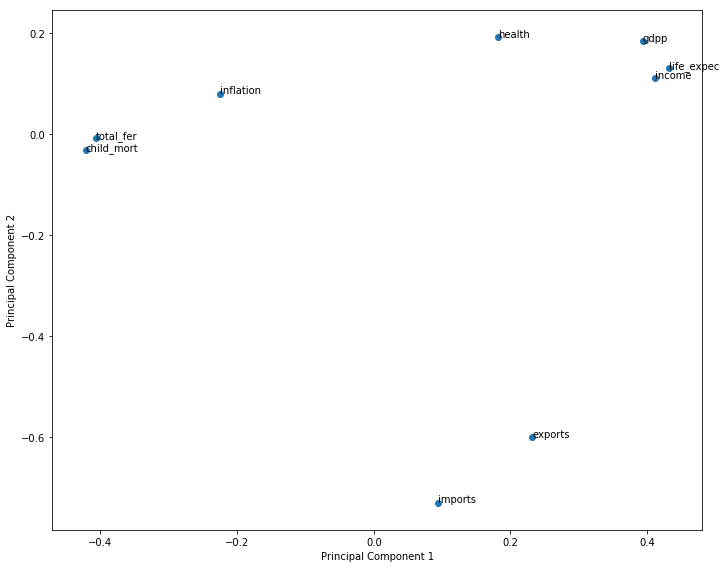

In [22]:
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [23]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

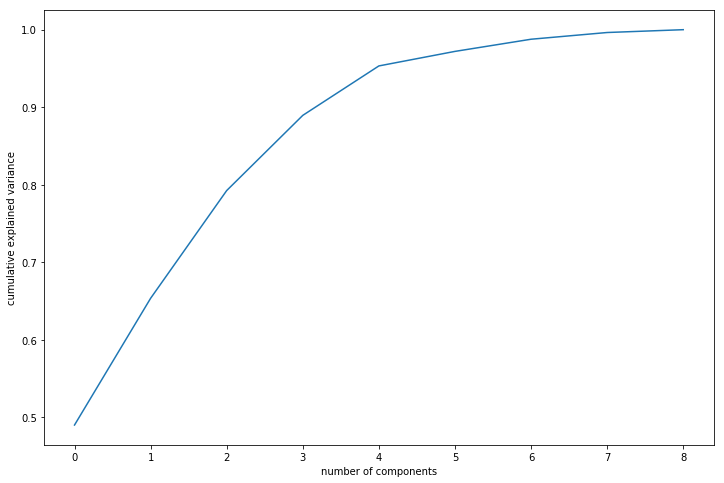

In [24]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.49018372, 0.65360581, 0.79255919, 0.88951584, 0.95326609,
       0.97200776, 0.98768985, 0.99635822, 1.        ])

### Since the Screeplot indicates that 4 components are enough to explain 95% of the data, we can take top 4 for clustering

In [26]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [27]:
df_pca = pca_final.fit_transform(pca_data)
df_pca.shape

(167, 4)

In [28]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

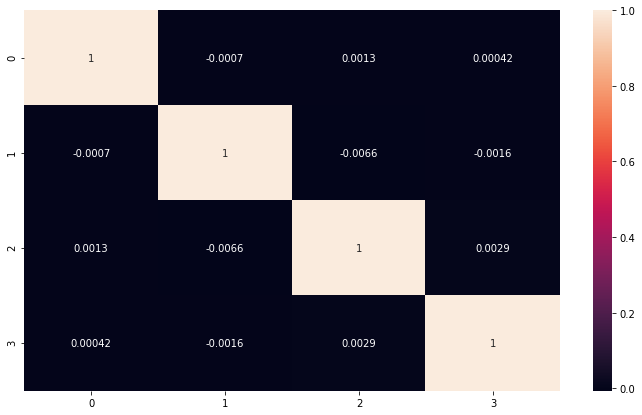

In [29]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (12,7))
sns.heatmap(corrmat,annot = True)

In [30]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0029369673234933007 , min corr:  -0.006552371941340576


### It is visible that there is no Correlation between the selected variables

In [31]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [32]:
df_pca.describe()

,0,1,2,3
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-3.722904e-17,3.889105e-17,5.983238e-18,6.648042e-18
std,2.106689e+00,1.216018e+00,1.120780e+00,9.365409e-01
min,-3.785123e+00,-3.074659e+00,-3.059465e+00,-1.680753e+00
25%,-1.640883e+00,-9.268854e-01,-7.143070e-01,-7.312750e-01
50%,1.473298e-02,-8.095995e-02,-2.539879e-01,-1.671836e-01
75%,1.426456e+00,8.758923e-01,6.293370e-01,8.329234e-01
max,4.118729e+00,2.972856e+00,3.283989e+00,3.148943e+00


In [33]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_pca)
 

0.7489504438590959

### A Hopkins Statistic of around 0.7 shows that there is high tendency for data clusters

In [36]:
df_pca_hc = df_pca.copy()
df_pca_hc.head()

,0,1,2,3
0,-3.275720,-0.427284,-1.055199,0.906249
1,0.483960,-0.161179,-0.284769,-1.425874
2,-0.447318,-0.424388,1.832563,-0.622794
3,-3.359135,1.259644,1.980609,1.750224
4,1.244074,0.697703,-0.269676,-0.771221


In [37]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

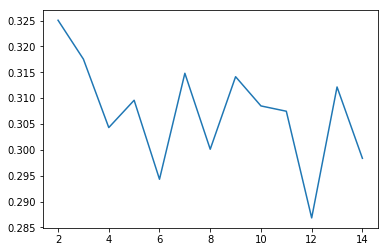

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

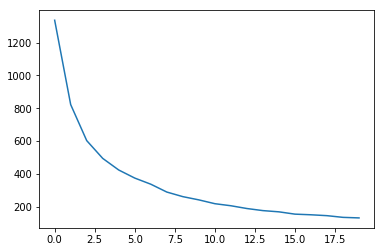

In [40]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### The elbow curves at around 4 on X-axis, hence we will choose 4 clusters for K means

In [41]:
# Kmeans with K=4
model = KMeans(n_clusters = 4, max_iter=50, random_state=100)
clusters = model.fit(df_pca)

In [42]:
df_pca['cluster'] = pd.Series(clusters.labels_, index=df_pca.index)
df_pca.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,2
1,0.483960,-0.161179,-0.284769,-1.425874,3
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,3


In [43]:
df_pca_kmean = pd.concat([country_data['country'], df_pca], axis=1, join='outer')
df_pca_kmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
country      167 non-null object
PC1          167 non-null float64
PC2          167 non-null float64
PC3          167 non-null float64
PC4          167 non-null float64
ClusterID    167 non-null int32
dtypes: float64(4), int32(1), object(1)
memory usage: 7.3+ KB


In [44]:
df_pca_kmean.head()


,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,2
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,3
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,3


### No. of countries in each cluster

In [45]:
df_pca_kmean.ClusterID.value_counts()

3    51
2    47
1    35
0    34
Name: ClusterID, dtype: int64

### Merging the clusters with original Dataset

In [46]:
df_pca_with_original = df_pca_kmean[['country','ClusterID']].merge(country_df, on = 'country')
df_pca_with_original.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,3,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,3,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [47]:
kmean_child_mort = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).child_mort.mean())
kmean_exports = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).exports.mean())
kmean_health = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).health.mean())
kmean_imports = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).imports.mean())
kmean_income = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).income.mean())
kmean_inflation = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).inflation.mean())
kmean_life_expec = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).life_expec.mean())
kmean_total_fer = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).total_fer.mean())
kmean_total_gdpp = pd.DataFrame(df_pca_with_original.groupby(["ClusterID"]).gdpp.mean())

In [49]:
df_pca_with_original.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,2,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,3,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,3,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Plots to check which clusters represent the data

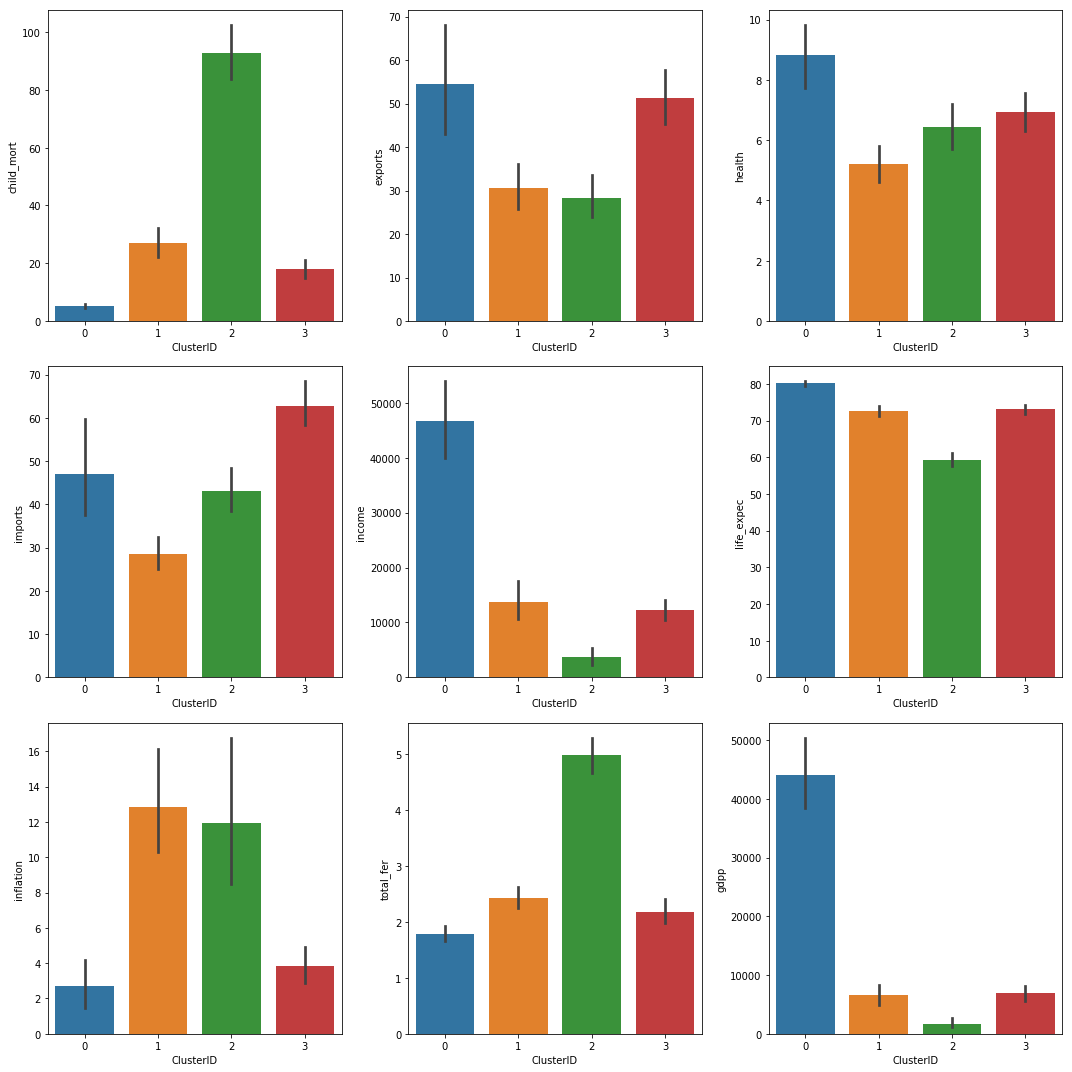

In [50]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.child_mort, ax = axs[0,0])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.exports, ax = axs[0,1])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.health, ax = axs[0,2])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.imports, ax = axs[1,0])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.income, ax = axs[1,1])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.life_expec, ax = axs[1,2])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.inflation, ax = axs[2,0])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.total_fer, ax = axs[2,1])
sns.barplot(x=df_pca_with_original.ClusterID, y=df_pca_with_original.gdpp, ax = axs[2,2])
plt.tight_layout()

### It is clearly visible from the plots above that Cluster no. 2 represents `High Child Mortality`, `Very low GDP`, `Very low income`.
### Hence, the countries in Cluster no. 2 require assistance from HELP international.

In [51]:
df_pca_kmean[df_pca_kmean.ClusterID == 2].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda',
       'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

### So, with Kmeans clustering, these 47 countries are in dire need of suppport

## Heirarchical Clustering

In [52]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

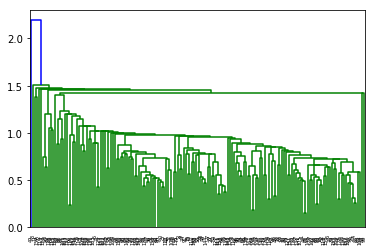

In [53]:
mergings = linkage(df_pca_hc, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

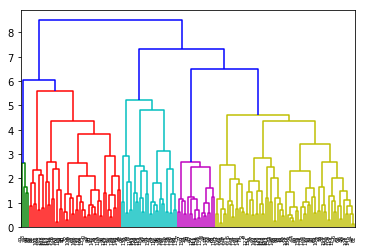

In [54]:
mergings = linkage(df_pca_hc, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### The dendrogram with 'Complete' method gives a clear picture of the data clusters

#### Looking at the dedrogram it is observed that cutting it at n = 5 is most optimum.

In [55]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","ClusterID"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-3.275720,-0.427284,-1.055199,0.906249,0
1,0.483960,-0.161179,-0.284769,-1.425874,1
2,-0.447318,-0.424388,1.832563,-0.622794,1
3,-3.359135,1.259644,1.980609,1.750224,2
4,1.244074,0.697703,-0.269676,-0.771221,1


In [56]:
df_pca_hc_final = pd.concat([country_data['country'], df_pca_hc], axis=1, join='outer')
df_pca_hc_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
country      167 non-null object
PC1          167 non-null float64
PC2          167 non-null float64
PC3          167 non-null float64
PC4          167 non-null float64
ClusterID    167 non-null int32
dtypes: float64(4), int32(1), object(1)
memory usage: 7.3+ KB


In [57]:
df_pca_hc_final.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-3.275720,-0.427284,-1.055199,0.906249,0
1,Albania,0.483960,-0.161179,-0.284769,-1.425874,1
2,Algeria,-0.447318,-0.424388,1.832563,-0.622794,1
3,Angola,-3.359135,1.259644,1.980609,1.750224,2
4,Antigua and Barbuda,1.244074,0.697703,-0.269676,-0.771221,1


In [58]:
df_pca_hc_final.ClusterID.value_counts()

1    70
0    46
4    28
3    19
2     4
Name: ClusterID, dtype: int64

In [59]:
df_pca_hc_with_original = df_pca_hc_final[['country','ClusterID']].merge(country_df, on = 'country')
df_pca_hc_with_original.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,2,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [60]:
hc_child_mort = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).child_mort.mean())
hc_exports = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).exports.mean())
hc_health = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).health.mean())
hc_imports = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).imports.mean())
hc_income = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).income.mean())
hc_inflation = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).total_fer.mean())
hc_total_gdpp = pd.DataFrame(df_pca_hc_with_original.groupby(["ClusterID"]).gdpp.mean())

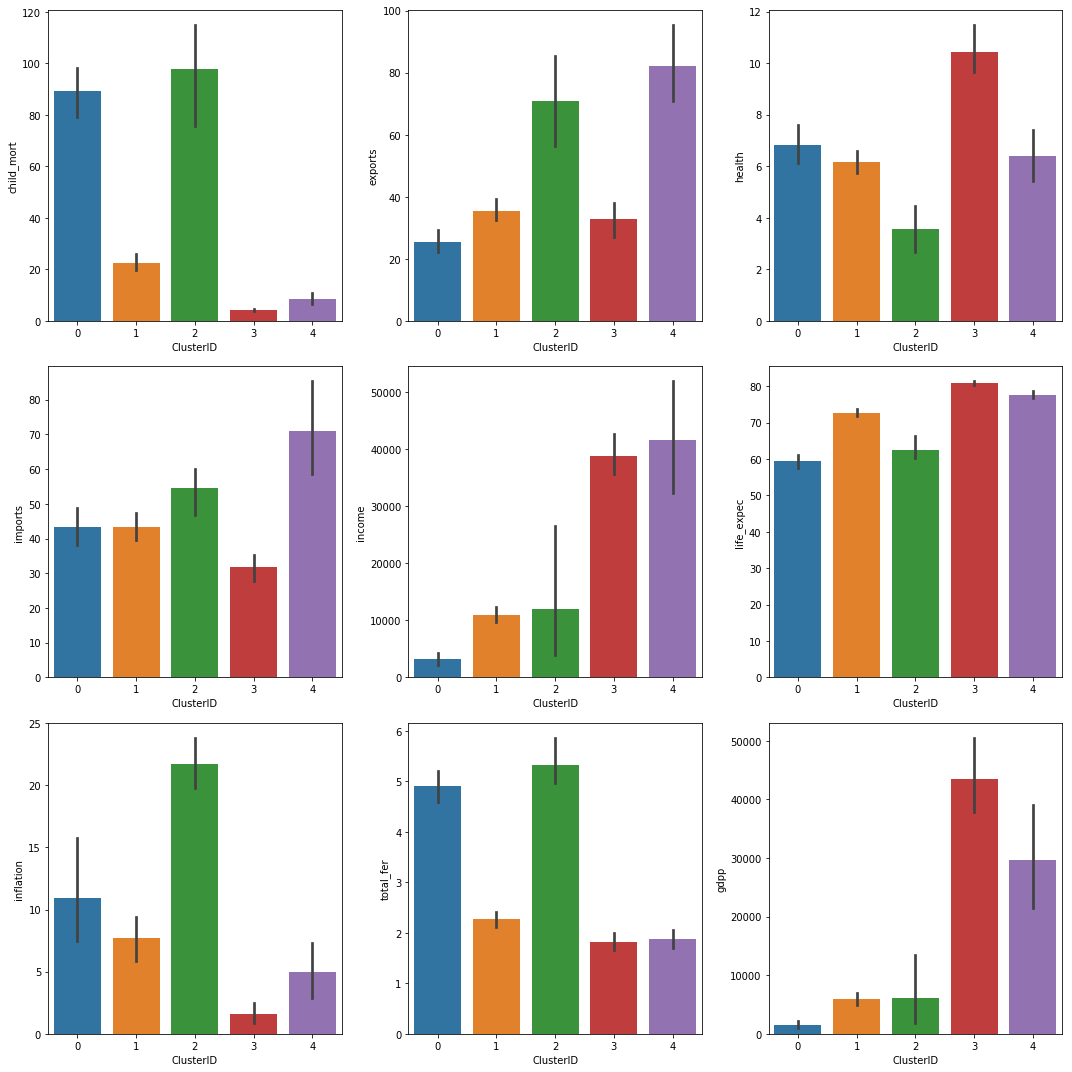

In [61]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.child_mort, ax = axs[0,0])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.exports, ax = axs[0,1])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.health, ax = axs[0,2])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.imports, ax = axs[1,0])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.income, ax = axs[1,1])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.life_expec, ax = axs[1,2])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.inflation, ax = axs[2,0])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.total_fer, ax = axs[2,1])
sns.barplot(x=df_pca_hc_with_original.ClusterID, y=df_pca_hc_with_original.gdpp, ax = axs[2,2])
plt.tight_layout()

### It is visible from the plots above that cluster no. 2 and cluster no. 0 are in dire need of assistance because of low gdp, high child mortality, low income etc.

In [62]:
df_pca_hc_with_original[df_pca_hc_with_original.ClusterID == 2].country.values

array(['Angola', 'Congo, Rep.', 'Equatorial Guinea', 'Mauritania'],
      dtype=object)

In [63]:
df_pca_hc_with_original[df_pca_hc_with_original.ClusterID == 0].country.values

array(['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

# ----------------------------------------------- END --------------------------------------------------